In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import blosc
import io

In [306]:
data = np.random.randint(0, 255, (256, 512, 512), dtype="uint8")

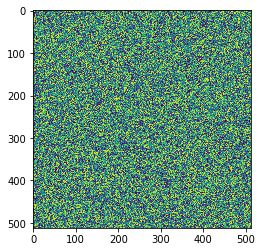

In [307]:
plt.imshow(data[0])

In [308]:
requests.post("http://localhost:5000/v1/cutout/col/exp/chan/0/0:256/0:512/0:512/", files={
    'file': data.tobytes()
})

<Response [200]>

In [324]:
res = requests.get(
    "http://localhost:5000/v1/cutout/col/exp/chan/0/0:3/0:512/0:512/",
    stream=True
).json()

In [325]:
newdata = np.array(res['data'], dtype=res['dtype'])

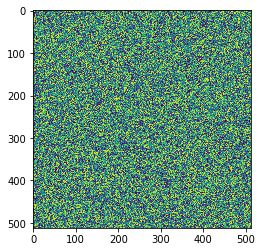

In [326]:
plt.imshow(newdata[0])

In [323]:
newdata.shape

(3, 512, 512)

In [338]:
res = requests.get(
    "http://localhost:5000/v1/cutout/cdol/exdp/chan/0/0:3/0:512/0:512/",
    stream=True
).json()

In [339]:
res

{'message': 'cdol/exdp/chan not found.'}